In [1]:
import tensorflow as tf
import utils

from CRNN import CRNN

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# model = CRNN()
# model.build_graph(1)

In [2]:
ckpt_states = tf.train.get_checkpoint_state(utils.CRNN_CHECKPOINT_DIR)
ckpt = ckpt_states.model_checkpoint_path
ckpt

'./checkpoint/crnn/crnn-model-60989'

In [3]:
with tf.gfile.GFile('./checkpoint/crnn/frozen_model_e9.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Graph().as_default() as graph:
    tf.import_graph_def(graph_def, name='CRNN')

x = graph.get_tensor_by_name('CRNN/inputs:0')
y = graph.get_tensor_by_name('CRNN/CTCBeamSearchDecoder:1')
seq_len = graph.get_tensor_by_name('CRNN/sequence_length:0')

In [4]:
import matplotlib.pyplot as plt
from DataManager import resize_image
import numpy as np

file_name = './dataset/custom/1/024.png'

img_arr = resize_image(file_name)
inputs = np.swapaxes(img_arr, axis1=0, axis2=1)
inputs = np.reshape(inputs, [1, 512, 32, 1])
inputs.shape

(1, 512, 32, 1)

In [7]:
img_arr

array([[0.03846151, 0.04615378, 0.04615378, ..., 0.08461535, 0.08461535,
        0.08461535],
       [0.03846151, 0.03846151, 0.03846151, ..., 0.09230763, 0.09230763,
        0.09230763],
       [0.03076917, 0.03846151, 0.03846151, ..., 0.09230763, 0.09230763,
        0.09230763],
       ...,
       [0.04615378, 0.04615378, 0.04615378, ..., 0.11538458, 0.11538458,
        0.11538458],
       [0.04615378, 0.04615378, 0.04615378, ..., 0.11538458, 0.11538458,
        0.11538458],
       [0.03846151, 0.03846151, 0.03846151, ..., 0.11538458, 0.11538458,
        0.11538458]], dtype=float32)

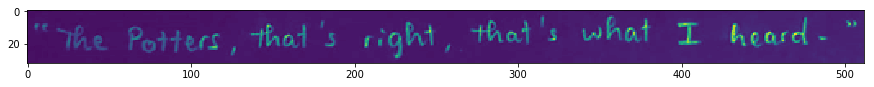

In [8]:
def plot_image(img):
    plt.figure(figsize=(15,40))
    plt.imshow(img)
    plt.show()
    
plot_image(img_arr)

In [9]:
filtered = img_arr - img_arr.min()
filtered = filtered / filtered.max()
filtered.min()

0.0

In [17]:
filtered.mean()

0.8954655

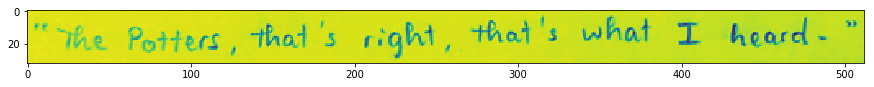

(1, 512, 32, 1)

In [12]:
filtered = 1 - filtered

plot_image(filtered)
inputs = np.swapaxes(filtered, axis1=0, axis2=1)
inputs = np.reshape(inputs, [1, 512, 32, 1])
inputs.shape

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


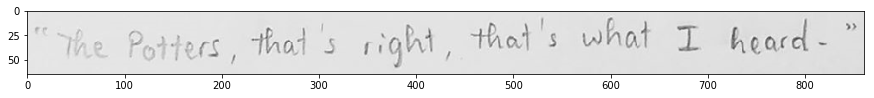

" The Polters, that's ight, that's what I heard-"


In [13]:
from scipy.misc import imread

with tf.Session(graph=graph) as sess:
    y_out = sess.run(y, feed_dict={
        x: inputs,
        seq_len: [127]
    })
    
img = imread(file_name)
plt.figure(figsize=(15,40))
plt.imshow(img)
plt.show()

print(utils.decode_result(y_out))

"the Bolters, that's right, that's what I heard-"

" The Polters, that's ight, that's what I heard-"